# NLP - Preprocessing and Classifying

## Part 2

### Situation:

Priya works at an international PR firm in the Europe division. Their largest client has offices in Ibiza, Madrid, and Las Palmas. She needs to keep her boss aware of current events and provide a weekly short list of articles concerning political events in Spain. The problem is, her Facebook newsfeed consistently shows her satire articles that people think are real truth! She wonders if she could automate the filtering process by using NLP to save her time...

### **Goal**: to internalize the steps, challenges, and methodology of text mining
- explore text analysis by hand
- apply text mining steps in Jupyter with Python libraries NLTK
- classify documents correctly

## Refresher on cleaning text
![gif](https://www.nyfa.edu/student-resources/wp-content/uploads/2014/10/furious-crazed-typing.gif)


In [1]:
import nltk
import sklearn
import urllib
import numpy as np
import pandas as pd
import string, re
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)


In [2]:
pd.set_option('display.max_columns', 200)

### Document statistics

### Document Frequency (DF)

$\begin{align}
 tf_{i,j} = \dfrac{n_{i,j}}{\displaystyle \sum_k n_{i,j} }
\end{align} $

### Inverse Document Frequency (IDF)

$\begin{align}
idf(w) = \log \dfrac{N}{df_t}
\end{align} $

### TF-IDF score

$ \begin{align}
w_{i,j} = tf_{i,j} \times \log \dfrac{N}{df_i} \\
tf_{i,j} = \text{number of occurences of } i \text{ in } j \\
df_i = \text{number of documents containing }   i \\
N = \text{total number of documents}
\end{align} $


### The from scratch method
![homemade](https://media2.giphy.com/media/LBZcXdG0eVBdK/giphy.gif?cid=3640f6095c2d7bb2526a424a4d97117c)


# Siiiiiiike!

## Yes, there is an easier way

![big deal](https://media0.giphy.com/media/xUA7aQOxkz00lvCAOQ/giphy.gif?cid=3640f6095c2d7c51772f47644d09cc8b)


### Next Steps:
- Create the tf-idf for the **whole** corpus of 12 articles
- What are _on average_ the most important words in the whole corpus?
- Add a column named "Target" to the dataset
- Target will be set to 1 or 0 if the article is "Politics" or "Not Politics"
- Do some exploratory analysis of the dataset
 - what are the average most important words for the "Politics" articles?
 - What are the average most important words for the "Not Politics"?

In [3]:
docZZZ = 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/'

In [4]:
alphabet = []
for letter in range(65, 91):
    alphabet.append(chr(letter))

list_of_letters = alphabet[:12]

In [5]:
url_list = []

In [6]:
for l in list_of_letters:
    url = docZZZ + l +'.txt'
    url_list.append(url)

In [7]:
url_list

['https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/A.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/B.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/C.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/D.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/E.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/F.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/G.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/H.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/I.txt',
 'https://raw.githubusercontent.com/aapeebles/text_examples/master/Text%20examples%20folder/J.txt',


In [37]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/michael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/michael/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
stop_words = stopwords.words('english')

In [11]:
lemmatizer = WordNetLemmatizer()
# stemmer = SnowballStemmer("english")

In [12]:
# Example of how to implement a stemmer, but we won't be using stems for the classification

# def clean_docs_STEM(_list):
#     cleaned = []
#     for i in _list:
#         metamorph = urllib.request.urlopen(i).read()
#         morph = metamorph.decode("utf-8")
#         pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
#         metamorph_tokens_raw = nltk.regexp_tokenize(morph, pattern)
#         metamorph_tokens = [i.lower() for i in metamorph_tokens_raw]
#         stop_words = stopwords.words('english')
#         metamorph_tokens_stopped = [w for w in metamorph_tokens if not w in stop_words]
#         meta_stemmed = [stemmer.stem(word) for word in metamorph_tokens_stopped]
#         c = " ".join(str(x) for x in meta_stemmed)
#         cleaned.append(c)
#     return cleaned

In [13]:
def clean_docs_LEMM(_list):
    cleaned = []
    for i in _list:
        metamorph = urllib.request.urlopen(i).read()
        morph = metamorph.decode("utf-8")
        pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
        metamorph_tokens_raw = nltk.regexp_tokenize(morph, pattern)
        metamorph_tokens = [i.lower() for i in metamorph_tokens_raw]
        stop_words = stopwords.words('english')
        metamorph_tokens_stopped = [w for w in metamorph_tokens if not w in stop_words]
        meta_lemmed = [lemmatizer.lemmatize(word) for word in metamorph_tokens_stopped]
        c = " ".join(str(x) for x in meta_lemmed)
        cleaned.append(c)
    return cleaned

In [16]:
# docs_STEM = clean_docs_STEM(url_list)

docs_LEMM = clean_docs_LEMM(url_list)

# We will need this for later:
df_LEMM_articles = pd.DataFrame(docs_LEMM)

In [17]:
# vec = CountVectorizer()
tfidf = TfidfVectorizer()

In [18]:
X = tfidf.fit_transform(docs_LEMM)
df = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names())

In [19]:
# clean_docs_LEMM(url_list)[2]
# urllib.request.urlopen(url_list[2]).read()

In [20]:
target = ['POLITICS', 'POLITICS', 'Not_politics', 'POLITICS', 'POLITICS', 'Not_politics', 
    'Not_politics', 'POLITICS', 'Not_politics', 'Not_politics', 'POLITICS', 'Not_politics']

In [21]:
df['TARGET'] = target

In [22]:
df['TARGET'] = pd.get_dummies(df.TARGET, drop_first=True)

In [23]:
df.head()

,abate,abiyote,able,abstain,access,accessed,according,account,accurate,achieve,acre,across,action,activist,actually,adam,add,address,adoption,affair,affected,affordable,agency,agent,aggravated,agio,agreed,agreement,aid,aide,aiming,allaying,allow,allowing,allows,almost,already,also,altering,amazon,american,among,analysis,andrew,announce,announced,annual,another,answer,anti,appear,april,area,arena,arkansas,around,arrested,asks,athens,athletics,attachment,attracted,august,australia,automatic,awaited,back,backed,bail,bank,barbara,base,based,bbc,beat,begun,bekele,belief,believed,bernard,bershawn,best,better,big,biggest,birmingham,bn,bnp,body,boost,boston,bowles,brannen,breach,break,brighton,bringing,britain,british,briton,...,take,taking,talent,talk,target,tax,taxpayer,team,technology,teenager,telephony,tell,ten,terminal,text,they,think,third,thought,three,throne,thursday,tight,time,tipped,title,top,train,training,travel,travelodge,true,tsunami,tuesday,tv,twelfth,twice,two,tyndall,uk,ultimate,unable,underestimating,union,unrelated,unsolicited,unveiled,use,used,user,using,variously,vaughan,ve,venue,via,victory,video,view,virgin,virus,vocal,voice,voluntarily,voting,wale,want,warn,warned,warning,watch,way,we,wealthy,website,week,welcome,welcomed,well,went,west,whipped,wi,william,win,winning,wireless,without,women,wondimu,wood,word,world,would,xbox,year,yepp,yh,yorkshire,TARGET
0,0.0,0.0,0.0,0.05826,0.0,0.000000,0.000000,0.000000,0.0,0.05826,0.0,0.0,0.05826,0.000000,0.0,0.000000,0.0,0.000000,0.05826,0.05826,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.05826,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.050034,0.05826,0.000000,0.000000,0.0,0.0,0.100068,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.05826,0.00000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.05826,0.065690,0.000000,0.000000,0.000000,0.0,0.0,0.044198,0.000000,0.000000,0.0,0.050034,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.05826,0.0,0.0,0.05826,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.05826,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.044198,0.0,0.0,0.0,0.05826,0.000000,0.098535,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.00000,0.087406,0.000000,0.000000,0.000000,0.000000,0.0,0.087406,0.087406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098554,0.000000,0.00000,0.0,0.000000,0.087406,0.0,0.087406,0.075065,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.087406,0.0,0.0,0.000000,0.000000,0.000000,0.087406,0.0,0.0,0.087406,0.0,0.0,0.0,0.0,0.0,0.087406,0.0,0.087406,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.06631,0.000000,0.087406,...,0.000000,0.0,0.0,0.087406,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.087406,0.0,0.0,0.087406,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.174812,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.087406,0.000000,0.06631,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.049277,0.049277,0.000000,0.035520,0.000000,0.000000,0.000000,1


In [24]:
df.describe()

,abate,abiyote,able,abstain,access,accessed,according,account,accurate,achieve,acre,across,action,activist,actually,adam,add,address,adoption,affair,affected,affordable,agency,agent,aggravated,agio,agreed,agreement,aid,aide,aiming,allaying,allow,allowing,allows,almost,already,also,altering,amazon,american,among,analysis,andrew,announce,announced,annual,another,answer,anti,appear,april,area,arena,arkansas,around,arrested,asks,athens,athletics,attachment,attracted,august,australia,automatic,awaited,back,backed,bail,bank,barbara,base,based,bbc,beat,begun,bekele,belief,believed,bernard,bershawn,best,better,big,biggest,birmingham,bn,bnp,body,boost,boston,bowles,brannen,breach,break,brighton,bringing,britain,british,briton,...,take,taking,talent,talk,target,tax,taxpayer,team,technology,teenager,telephony,tell,ten,terminal,text,they,think,third,thought,three,throne,thursday,tight,time,tipped,title,top,train,training,travel,travelodge,true,tsunami,tuesday,tv,twelfth,twice,two,tyndall,uk,ultimate,unable,underestimating,union,unrelated,unsolicited,unveiled,use,used,user,using,variously,vaughan,ve,venue,via,victory,video,view,virgin,virus,vocal,voice,voluntarily,voting,wale,want,warn,warned,warning,watch,way,we,wealthy,website,week,welcome,welcomed,well,went,west,whipped,wi,william,win,winning,wireless,without,women,wondimu,wood,word,world,would,xbox,year,yepp,yh,yorkshire,TARGET
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.006763,0.006763,0.007728,0.004855,0.007728,0.005283,0.008935,0.010833,0.010076,0.004855,0.005133,0.005133,0.004855,0.004859,0.005038,0.005121,0.009127,0.005283,0.004855,0.004855,0.007284,0.005121,0.010566,0.004859,0.004859,0.007719,0.007284,0.007284,0.005133,0.010265,0.010998,0.005038,0.003864,0.003864,0.003864,0.008969,0.014462,0.024038,0.005121,0.004855,0.005311,0.005121,0.007284,0.005038,0.007284,0.012884,0.005133,0.004859,0.008945,0.010076,0.013353,0.015438,0.004859,0.006763,0.005311,0.011592,0.043730,0.008935,0.012086,0.007719,0.021131,0.009127,0.006043,0.007719,0.007719,0.005121

## Corpus Statistics 

How many non-zero elements are there?
- Adapt the code below, using the `df` version of the `response` object to replace everywhere below it says `DATA`
- Interpret the findings


In [25]:
features = df.iloc[:, :-1]

# target = df.TARGET

In [29]:
# Edit code before running it

non_zero_cols = np.count_nonzero(features) / float(features.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(features.shape[1]))
print('Percentage of columns containing 0: {}%'.format(round(percent_sparse*100,4)))

Average Number of Non-Zero Elements in Vectorized Articles: 93.0
Percentage of columns containing 0: 89.261%


In [30]:
# adding for processing:

df_LEMM_articles['TARGET'] = target

df_LEMM_articles['TARGET'] = pd.get_dummies(df.TARGET, drop_first=True)

In [31]:
stop_words = stopwords.words('english')

def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [32]:
df_LEMM_articles.columns = ['body', 'TARGET']

In [33]:
# processed_data = list(map(process_article, df_LEMM_articles))

In [34]:
# Separate the dataframe by target into two dataframes

df_freq_politics = df_LEMM_articles[df_LEMM_articles['TARGET']==1]

df_freq_not_politics = df_LEMM_articles[df_LEMM_articles['TARGET']==0]

In [35]:
# Set your data to the 'body'

data_politics = df_freq_politics['body']
data_not_politics = df_freq_not_politics['body']

In [38]:
pros_politics = list(map(process_article, data_politics))
pros_not_politics = list(map(process_article, data_not_politics))

In [39]:
# Total vocabulary for POLITICS

total_vocab_politics = set()
for article in pros_politics:
    total_vocab_politics.update(article)
    
len(total_vocab_politics)

485

In [40]:
# Total vocabulary for NOT POLITICS

total_vocab_NOT_politics = set()
for article in pros_not_politics:
    total_vocab_NOT_politics.update(article)
    
len(total_vocab_NOT_politics)

468

In [41]:
# How to flatten the data accordingly
# flat_list = [item for sublist in l for item in sublist]

flat_politics = [item for sublist in pros_politics for item in sublist]
flat_not_politics = [item for sublist in pros_not_politics for item in sublist]

In [42]:
politics_freq = FreqDist(flat_politics)
not_politics_freq = FreqDist(flat_not_politics)

In [43]:
politics_freq.most_common(20)

[('said', 15),
 ('arrested', 9),
 ('fbi', 8),
 ('computer', 7),
 ('would', 7),
 ('duchy', 7),
 ('immigration', 7),
 ('independent', 7),
 ('say', 6),
 ('e', 6),
 ('mail', 6),
 ('income', 6),
 ('prince', 6),
 ('law', 5),
 ('invention', 5),
 ('one', 5),
 ('two', 5),
 ('year', 5),
 ('public', 5),
 ('virus', 5)]

In [44]:
not_politics_freq.most_common(20)

[('world', 24),
 ("'s", 22),
 ('year', 12),
 ('record', 12),
 ('indoor', 12),
 ('olympic', 10),
 ('user', 10),
 ('gadget', 9),
 ('skype', 9),
 ('mark', 8),
 ('champion', 8),
 ('sec', 8),
 ('medallist', 8),
 ('bekele', 7),
 ('net', 6),
 ('call', 6),
 ('mobile', 5),
 ('would', 5),
 ('sullivan', 5),
 ('ireland', 5)]

# Classification

## Preprocessing

In [47]:
df = pd.read_csv('nlp_classification.csv')

In [48]:
df.head()

,body,target
0,Noting that the resignation of James Mattis as...,1
1,Desperate to unwind after months of nonstop wo...,1
2,"Nearly halfway through his presidential term, ...",1
3,Attempting to make amends for gross abuses of ...,1
4,Decrying the Senate’s resolution blaming the c...,1


In [49]:
data = df['body']
target = df['target']

In [50]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',
            'said', 'one', 'com', 'satirewire', '-', '–', '—', 'satirewire.com']
sw_set = set(sw_list)

In [51]:
def remove_punc(text):
    words = text.split()
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    removed = [w.lower() for w in stripped]
    return removed

In [52]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [53]:
df.isna().sum()

body      0
target    0
dtype: int64

In [54]:
processed_data = list(map(process_article, data))

In [55]:
# mmll = set()
# mmll.update(['3', '2'])

In [56]:
# mmll

In [57]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

26669

In [58]:
def join_list(listy): 
    ' '.join(listy)
        
# X = [' '.join(d) for d in processed_data]
# y = target
# X[3]

In [59]:
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [60]:
# lemmatized_output[:5]

In [65]:
#X_lem = [' '.join(d) for d in processed_data]
X_lem = lemmatized_output
y_lem = target
# X[3]

In [66]:
### LEMMING TRAIN TEST SPLIT ###

In [67]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

In [68]:
tfidf = TfidfVectorizer()
tfidf_data_train_lem = tfidf.fit_transform(X_train_lem)
tfidf_data_test_lem = tfidf.transform(X_test_lem)

tfidf_data_train_lem

<800x19673 sparse matrix of type '<class 'numpy.float64'>'
	with 130781 stored elements in Compressed Sparse Row format>

### Lets classify

In [69]:
rf_classifier_lem = RandomForestClassifier(n_estimators=100, random_state=0)

In [70]:
rf_classifier_lem.fit(tfidf_data_train_lem, y_train_lem)
rf_test_preds_lem = rf_classifier_lem.predict(tfidf_data_test_lem)

In [71]:
rf_acc_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)
rf_f1_score_lem = f1_score(y_test_lem, rf_test_preds_lem)
print('Random Forest w/ Lemmatization')
print("Testing Accuracy: {:.4}".format(rf_acc_score_lem))
print()
print("F1 Score: {:.4}".format(rf_f1_score_lem))

Random Forest w/ Lemmatization
Testing Accuracy: 0.97

F1 Score: 0.9691


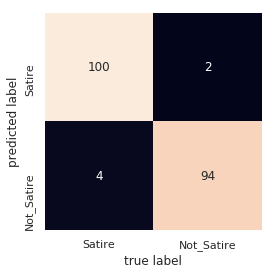

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


mat = confusion_matrix(y_test_lem, rf_test_preds_lem)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['Satire', 'Not_Satire'], yticklabels=['Satire', 'Not_Satire'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [73]:
X_test_lem

['leader canada united state monday agreed continue pressing beijing free two canadian citizen detained arrest senior chinese executive vancouver ottawa canada want immediate release michael kovrig michael spavor picked canadian authority arrested huawei technology co hwt.ul chief financial officer meng wanzhou dec. 1 request united state china denounced move affair threatening increase global tension time washington beijing already locked trade war canadian prime minister justin trudeau spoke u.s. president donald trump monday thanked strong statement support united state response detention two men trudeau office statement two leader agreed continue seek release statement separate statement white house trump trudeau discussed unlawful detention two canadian citizen china. gave detail although canada say china made specific link detention meng arrest expert former diplomat say doubt beijing using case kovrig spavor pressure ottawa beijing insists charge meng dropped canada say interfer

### Some corpus statistics:

In [74]:
non_zero_cols = tfidf_data_train_lem.nnz / float(tfidf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tfidf_data_train_lem.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 163.47625
Percentage of columns containing 0: 0.9916903243023433


#### Most frequent words:

In [75]:
df_freq_satire = df[df['target']==1]
df_freq_not_satire = df[df['target']==0]

In [76]:
data_sat = df_freq_satire['body']
data_not_sat = df_freq_not_satire['body']

In [77]:
pros_satire = list(map(process_article, data_sat))
pros_not_satire = list(map(process_article, data_not_sat))

In [78]:
total_vocab_sat = set()
for comment in pros_satire:
    total_vocab_sat.update(comment)
len(total_vocab_sat)

19090

In [79]:
total_vocab_NOT_sat = set()
for comment in pros_not_satire:
    total_vocab_NOT_sat.update(comment)
len(total_vocab_NOT_sat)

15186

In [80]:
# We will need this for later:

# flat_list = [item for sublist in l for item in sublist]
flat_satire = [item for sublist in pros_satire for item in sublist]
flat_not_satire = [item for sublist in pros_not_satire for item in sublist]

In [83]:
satire_freq = FreqDist(flat_satire)
not_satire_freq = FreqDist(flat_not_satire)

In [84]:
# satire_freq.most_common(20)
# not_satire_freq.most_common(20)

#### Normalized word frequencies:

In [85]:
satire_total_word_count = sum(satire_freq.values())
satire_top_25 = satire_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in satire_top_25:
    normalized_frequency = word[1]/satire_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

people 		 0.005193
eu 		 0.005013
would 		 0.004825
may 		 0.004319
like 		 0.004062
even 		 0.003556
time 		 0.003265
many 		 0.003256
get 		 0.002965
also 		 0.002965
brexit 		 0.002879
britain 		 0.002674
world 		 0.002579
way 		 0.002477
well 		 0.002477
new 		 0.002408
see 		 0.002314
every 		 0.002245
right 		 0.002194
us 		 0.002151
much 		 0.002074
however 		 0.002048
could 		 0.00204
trump 		 0.002022
theresa 		 0.001945


In [86]:
not_satire_total_word_count = sum(not_satire_freq.values())
not_satire_top_25 = not_satire_freq.most_common(25)
print("Word \t\t Normalized Frequency")
print()
for word in not_satire_top_25:
    normalized_frequency = word[1]/not_satire_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency

u.s. 		 0.00615
trump 		 0.005622
government 		 0.005266
would 		 0.004774
president 		 0.004702
people 		 0.003544
state 		 0.003326
year 		 0.003061
told 		 0.003025
new 		 0.002952
security 		 0.002934
also 		 0.002907
last 		 0.002907
two 		 0.002815
united 		 0.002743
reuters 		 0.002688
could 		 0.002679
china 		 0.002579
country 		 0.002542
percent 		 0.002497
since 		 0.002342
states 		 0.002269
monday 		 0.002251
house 		 0.002241
police 		 0.002077


#### Let's visualize it:

In [87]:
satire_bar_counts = [x[1] for x in satire_freq.most_common(20)]
satire_bar_words = [x[0] for x in satire_freq.most_common(20)]

not_satire_bar_counts = [x[1] for x in not_satire_freq.most_common(20)]
not_satire_bar_words = [x[0] for x in not_satire_freq.most_common(20)]

In [88]:
from matplotlib import cm
color = cm.viridis_r(np.linspace(.4,.8, 30))

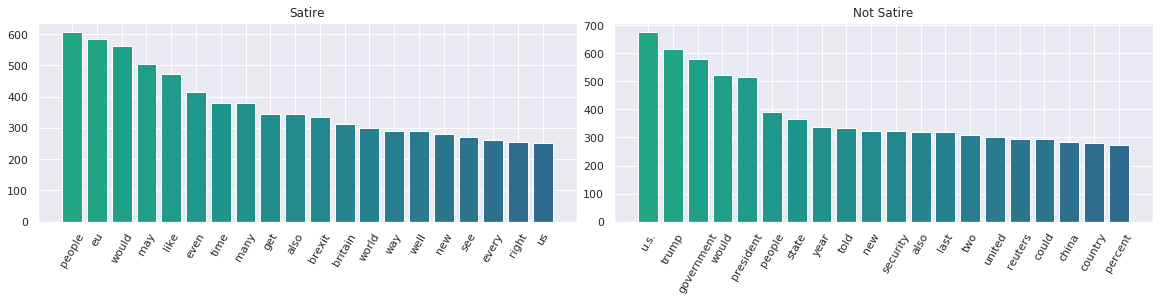

In [89]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(satire_bar_words, satire_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(not_satire_bar_words, not_satire_bar_counts, color=color )

ax.title.set_text('Satire')
ax2.title.set_text('Not Satire')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# plt.savefig('word count bar graphs.png')

plt.show()

In [90]:
# !pip install wordcloud

In [91]:
# Getting our data into a dictionary
# dictionary = dict(zip(keys, values))

satire_dictionary = dict(zip(satire_bar_words, satire_bar_counts))
not_satire_dictionary = dict(zip(not_satire_bar_words, not_satire_bar_counts))

In [92]:
# satire_dictionary

In [95]:
from wordcloud import WordCloud

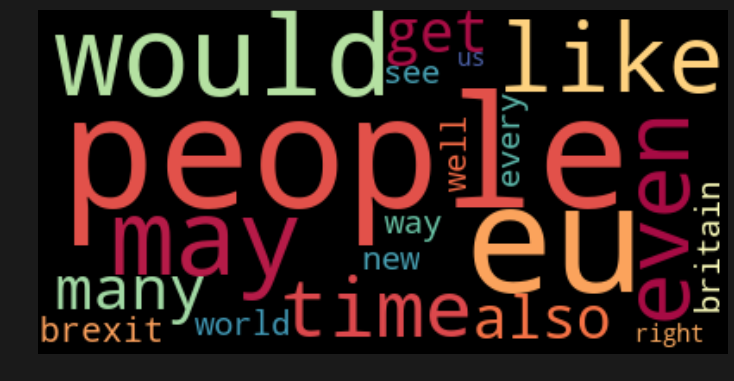

In [96]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(satire_dictionary)

# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('satire_wordcloud.png')

plt.show()

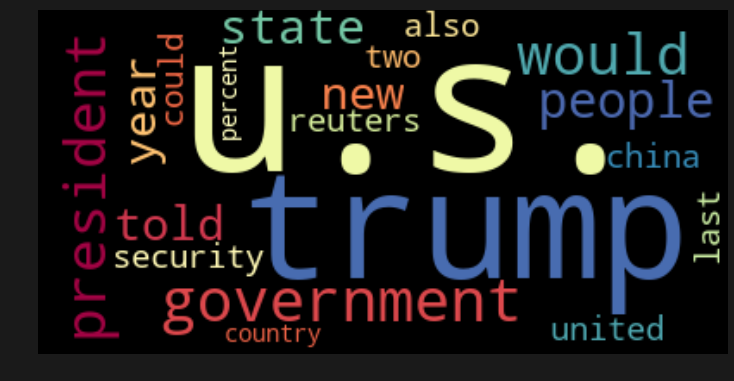

In [97]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_satire_dictionary)

# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
# plt.savefig('not_satire_wordcloud.png')
# plt.savefig('wordcloud_test.png', facecolor='k', bbox_inches='tight')

plt.show()

## Bi-grams:

#### Creating Bigrams:

Knowing individual word frequencies is somewhat informative, but in practice, some of these tokens are actually parts of larger phrases that should be treated as a single unit. Let's create some bigrams, and see which combinations of words are most telling.

In the cells below:

* We'll begin by aliasing a particularly long method name to make it easier to call. Store `nltk.collocations.BigramAssociationMeasures()` inside of the variable `bigram_measures`.
* Next, we'll need to create a **_finder_**. Pass `flat_satire` into `BigramCollocationFinder.from_words()` and store the result returned inside of `satire_finder`.
* Once we have a finder, we can use it to compute bigram scores, so we can see the combinations that occur most frequently. Call the `satire_finder` object's `score_ngrams()` method and pass in `bigram_measures.raw_freq` as the input. 
* Display first 50 elements in the `satire_scored` list to see the 50 most common bigrams in satire. 
* Do the same for `flat_not_satire`

In [98]:
satire_bigram_measures = nltk.collocations.BigramAssocMeasures()
satire_finder = BigramCollocationFinder.from_words(flat_satire)
satire_scored = satire_finder.score_ngrams(satire_bigram_measures.raw_freq)

In [99]:
satire_scored[:10]

[(('theresa', 'may'), 0.0018681657697185753),
 (('prime', 'minister'), 0.0010112089946183115),
 (('right', 'hon'), 0.0005141740650601584),
 (('social', 'media'), 0.0005056044973091558),
 (('daily', 'squib'), 0.0004798957940561478),
 (('donald', 'trump'), 0.00044561752305213723),
 (('hon', 'friend'), 0.00041990881979912933),
 (('even', 'though'), 0.0004113392520481267),
 (('jeremy', 'corbyn'), 0.00038563054879511876),
 (('united', 'states'), 0.00035135227779110824)]

In [100]:
not_satire_bigram_measures = nltk.collocations.BigramAssocMeasures()
not_satire_finder = BigramCollocationFinder.from_words(flat_not_satire)
not_satire_scored = not_satire_finder.score_ngrams(not_satire_bigram_measures.raw_freq)

In [101]:
not_satire_scored[:10]

[(('united', 'states'), 0.0020227606126595656),
 (('donald', 'trump'), 0.0012391686636112655),
 (('president', 'donald'), 0.001193610992154969),
 (('white', 'house'), 0.00104782644349482),
 (('15', 'minutes'), 0.0010113803063297828),
 (('last', 'year'), 0.0010022687720385236),
 (('2019', 'reuters'), 0.0009931572377472643),
 (('complete', 'list'), 0.0009931572377472643),
 (('delayed', 'minimum'), 0.0009931572377472643),
 (('delays', '©'), 0.0009931572377472643)]

### mutual info scores

These look a bit more interesting. We can see here that some of the most common ones are stage directions, such as 'Enter Macbeth' and 'Exeunt Scena', while others seem to be common phrases used in the play. 

To wrap up our initial examination of _Satire_, let's end by calculating **_Mutual Information Scores_**.

#### Using Mutual Information Scores

To calculate Mutual Information Scores, we'll need to first create a frequency filter, so that we only examine bigrams that occur more than a set number of times--for our purposes, we'll set this limit to 5. 

In NLTK, mutual information is often referred to as `pmi`, for **_Pointwise Mutual Information_**. Calculating PMI scores works much the same way that we created bigrams, with a few notable differences.

In the cell below:

* We'll start by creating another finder for pmi. Create another `BigramCollocationFinder.from_words` and pass in `flat_satire` as the input. Store this is the variable `satire_pmi_finder`.
* Once we have our finder, we'll need to apply our frequency filter. Call `satire_pmi_finder`'s `apply_freq_filter` and pass in the number `5` as the input. 
* Now, we can use the finder to calculate pmi scores. Use the pmi finder's `.score_ngrams()` function, and pass in `bigram_measures.pmi` as the argument. Store this in `satire_pmi_scored`.
* Examine the first 50 elements in `satire_pmi_scored`.
* Do the same for `flat_not_satire`

In [102]:
satire_pmi_finder = BigramCollocationFinder.from_words(flat_satire)
satire_pmi_finder.apply_freq_filter(5)
satire_pmi_scored = satire_pmi_finder.score_ngrams(satire_bigram_measures.pmi)

In [103]:
satire_pmi_scored[:15]

[(('skid', 'row'), 14.24738363196792),
 (('anna', 'soubry'), 14.024991210631473),
 (('priti', 'patel'), 14.024991210631473),
 (('hans', 'soylo'), 13.832346132689075),
 (('michel', 'barnier'), 13.832346132689075),
 (('gon', 'na'), 13.662421131246763),
 (('kim', 'jong-un'), 13.662421131246763),
 (('octopus', 'grip'), 13.510418037801717),
 (('48', 'hrs'), 13.510418037801713),
 (('los', 'angeles'), 13.37291451405178),
 (('knackers', 'yard'), 13.372914514051779),
 (('echo', 'chamber'), 13.24738363196792),
 (('margaret', 'thatcher'), 13.24738363196792),
 (('tiffany', 'haddish'), 13.24738363196792),
 (('winston', 'churchill'), 13.24738363196792)]

In [104]:
not_satire_pmi_finder = BigramCollocationFinder.from_words(flat_not_satire)
not_satire_pmi_finder.apply_freq_filter(5)
not_satire_pmi_scored = not_satire_pmi_finder.score_ngrams(not_satire_bigram_measures.pmi)

In [105]:
not_satire_pmi_scored[:15]

[(('gerauds', 'wilfried'), 14.42194646453531),
 (('nakhon', 'si'), 14.42194646453531),
 (('si', 'thammarat'), 14.42194646453531),
 (('srey', 'heng'), 14.42194646453531),
 (('anak', 'krakatau'), 14.158912058701514),
 (('mick', 'mulvaney'), 14.158912058701514),
 (('guy-bertrand', 'mapangou'), 13.936519637365066),
 (('sar-e', 'pul'), 13.936519637365066),
 (('zaw', 'htay'), 13.936519637365066),
 (('corneille', 'nangaa'), 13.743874559422672),
 (('santos', 'cruz'), 13.743874559422672),
 (('andres', 'manuel'), 13.743874559422668),
 (('bharatiya', 'janata'), 13.743874559422668),
 (('koh', 'samui'), 13.714127216028619),
 (('jia', 'kurd'), 13.57394955798036)]